In [7]:
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt

In [8]:
sample_info_df = pd.read_excel('../FullRBPsWithEnzymes/Hugo_Samples_IDs.xlsx')
sample_info_df = sample_info_df.dropna()

rbfox2_id_to_label = {}

for r in sample_info_df.iterrows():
    r = r[1]
    
    label = r.Construct
    sample_id = r.Sample.replace('_', '-')
    
    if 'SLBP' not in label and 'RPS2' not in label:
        rbfox2_id_to_label[sample_id] = label
rbfox2_id_to_label

{'Hugo-A1': 'FOX2-APOBEC1_R1',
 'Hugo-A2': 'FOX2-APOBEC1_R2',
 'Hugo-A3': 'FOX2-APOBEC1_R3',
 'Hugo-B2': 'FOX2-p0078_R1',
 'Hugo-B3': 'FOX2-P0078_R2',
 'Hugo-B4': 'FOX2-P0078_R3',
 'Hugo-B5': 'FOX2-8e_R1',
 'Hugo-B6': 'FOX2-8e_R2',
 'Hugo-B7': 'FOX2-8e_R3',
 'Hugo-D4': 'APOBEC1_alone_R1',
 'Hugo-D5': 'APOBEC1_alone_R2',
 'Hugo-D6': 'APOBEC1_alone_R3',
 'Hugo-D7': '8e_alone_R1',
 'Hugo-D8': '8e_alone_R2',
 'Hugo-E1': '8e_alone_R3',
 'Hugo-E2': 'p0078_alone_R1',
 'Hugo-E3': 'p0078_alone_R2',
 'Hugo-E4': 'p0078_alone_R3',
 'Hugo-E5': 'MinA_alone_R1',
 'Hugo-E6': 'MinA_alone_R2',
 'Hugo-E7': 'MinA_alone_R3',
 'Hugo-E8': 'FOX2-MinA_R1',
 'Hugo-F1': 'FOX2-MinA_R2',
 'Hugo-F2': 'FOX2-MinA_R3'}

# Load edit files

/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity

Text(0.5, 1.0, 'RBFOX2 experiments: A>I edits')

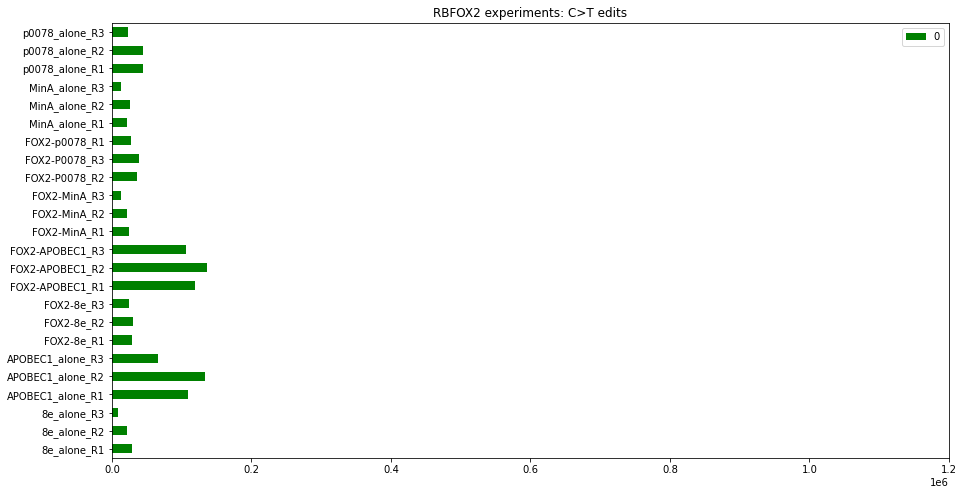

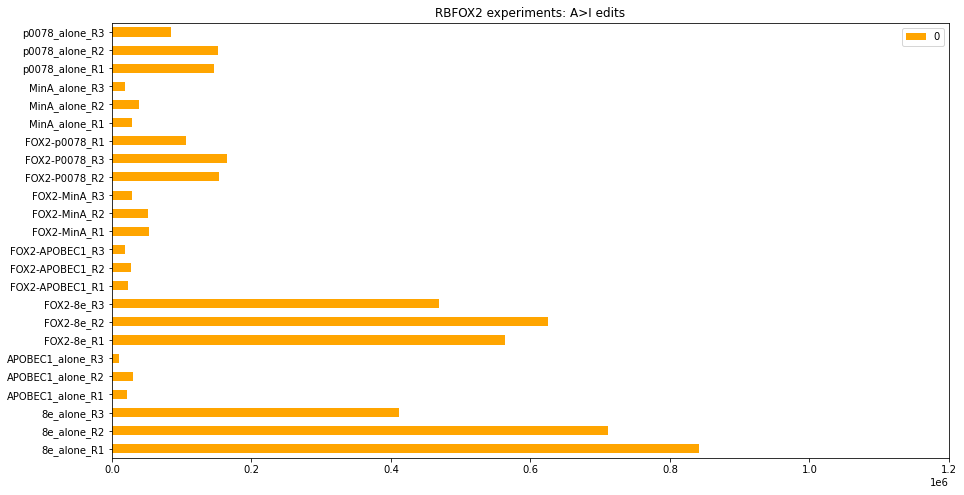

In [9]:
edit_count_ct = {}
edit_count_ai = {}

for f in glob('/projects/ps-yeolab4/ekofman/Hugo/RBFOX2_sailor_outs/*.bed'):
    sample_name = f.split('/')[-1].split('Aligned')[0]
    label = rbfox2_id_to_label.get(sample_name)
    #print(label)
    
    df = pd.read_csv(f, sep='\t', names=['chrom', 'start', 'end', 'score', 'coverage', 'strand'])
    df = df[df.score > 0.5]
    num_edits = len(df)
    edit_count_ct[label] = num_edits
    

for f in glob('/projects/ps-yeolab4/ekofman/Hugo/RBFOX2_sailor_outs_ai/*.bed'):
    sample_name = f.split('/')[-1].split('Aligned')[0]
    label = rbfox2_id_to_label.get(sample_name)
    #print(label)
    
    df = pd.read_csv(f, sep='\t', names=['chrom', 'start', 'end', 'score', 'coverage', 'strand'])
    df = df[df.score > 0.5]
    num_edits = len(df)
    edit_count_ai[label] = num_edits
    

xlim = 1200000

ct_edit_count_df = pd.DataFrame.from_dict(edit_count_ct, orient='index')
ct_edit_count_df = ct_edit_count_df.loc[sorted(ct_edit_count_df.index)]
ai_edit_count_df = pd.DataFrame.from_dict(edit_count_ai, orient='index')
ai_edit_count_df = ai_edit_count_df.loc[sorted(ai_edit_count_df.index)]
ct_edit_count_df.plot(kind='barh', figsize=(15, 8), color='green', xlim=(0, xlim))
plt.title("RBFOX2 experiments: C>T edits")
ai_edit_count_df.plot(kind='barh', figsize=(15, 8), color='orange', xlim=(0, xlim))
plt.title("RBFOX2 experiments: A>I edits")

### SLBP edit counts

In [10]:
import pandas as pd

manifest = pd.read_excel('reference/SLBP_Manifest.xlsx')
id_to_label = {}

for row in manifest.iterrows():
    row = row[1]
    id_to_label[row['Manifest Name']] = row['ID']
id_to_label

{'58_5': 'SLBP-APOBEC1_Rep1',
 '58_6': 'SLBP-APOBEC1_Rep2',
 '58_7': 'SLBP-APOBEC1_Rep3',
 '79_21': 'SLBP-p0078_Rep1',
 '79_22': 'SLBP-p0078_Rep2',
 '79_23': 'SLBP-p0078_Rep3',
 '81_25': 'SLBP-8e_Rep1',
 '81_26': 'SLBP-8e_Rep2',
 '81_27': 'SLBP-8e_Rep3',
 '94_37': 'APOBEC1_Only_Rep1',
 '94_38': 'APOBEC1_Only_Rep2',
 '94_39': 'APOBEC1_Only_Rep3',
 '99_42': '8e_Only_Rep1',
 '99_43': '8e_Only_Rep2',
 '99_44': '8e_Only_Rep3',
 '100_45': 'P0078_Only_Rep1',
 '100_46': 'P0078_Only_Rep2',
 '100_47': 'P0078_Only_Rep3',
 '101_49': 'MinA_Only_Rep1',
 '101_50': 'MinA_Only_Rep2',
 '101_51': 'MinA_Only_Rep3',
 '103_57': 'SLBP-MinA_Rep1',
 '103_58': 'SLBP-MinA_Rep2',
 '103_60': 'SLBP-MinA_Rep3'}

In [11]:
slbp_edit_count_ct = {}
slbp_edit_count_ai = {}

for f in glob('/projects/ps-yeolab4/ekofman/Hugo/SLBP_sailor_outs/*.bed'):
    sample_name = f.split('/')[-1].split('_S')[0]
    label = id_to_label.get(sample_name)
    print(label)
    
    df = pd.read_csv(f, sep='\t', names=['chrom', 'start', 'end', 'score', 'coverage', 'strand'])
    df = df[df.score > 0.5]

    num_edits = len(df)
    slbp_edit_count_ct[label] = num_edits
    

for f in glob('/projects/ps-yeolab4/ekofman/Hugo/SLBP_sailor_outs_ai/*.bed'):
    sample_name = f.split('/')[-1].split('_S')[0]
    label = id_to_label.get(sample_name)
    print(label)
    
    df = pd.read_csv(f, sep='\t', names=['chrom', 'start', 'end', 'score', 'coverage', 'strand'])
    df = df[df.score > 0.5]

    num_edits = len(df)
    slbp_edit_count_ai[label] = num_edits

P0078_Only_Rep2
8e_Only_Rep2
MinA_Only_Rep1
8e_Only_Rep3
APOBEC1_Only_Rep2


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


MinA_Only_Rep2
SLBP-MinA_Rep3
SLBP-p0078_Rep3
SLBP-APOBEC1_Rep2
SLBP-MinA_Rep2
SLBP-APOBEC1_Rep3
SLBP-APOBEC1_Rep1
P0078_Only_Rep1
8e_Only_Rep1
SLBP-p0078_Rep1
MinA_Only_Rep3
SLBP-MinA_Rep1
P0078_Only_Rep3
SLBP-8e_Rep1
SLBP-p0078_Rep2
APOBEC1_Only_Rep3


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SLBP-8e_Rep2
SLBP-8e_Rep3
APOBEC1_Only_Rep1
SLBP-8e_Rep1
P0078_Only_Rep3
APOBEC1_Only_Rep3
SLBP-p0078_Rep2
APOBEC1_Only_Rep1
SLBP-MinA_Rep1
SLBP-8e_Rep2
SLBP-8e_Rep3
APOBEC1_Only_Rep2
P0078_Only_Rep1
SLBP-APOBEC1_Rep2
SLBP-APOBEC1_Rep3
MinA_Only_Rep3
SLBP-APOBEC1_Rep1
8e_Only_Rep2


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SLBP-MinA_Rep2
8e_Only_Rep3


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SLBP-MinA_Rep3
MinA_Only_Rep2
SLBP-p0078_Rep3
8e_Only_Rep1


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


P0078_Only_Rep2
MinA_Only_Rep1
SLBP-p0078_Rep1


Text(0.5, 1.0, 'SLBP experiments: A>I edits')

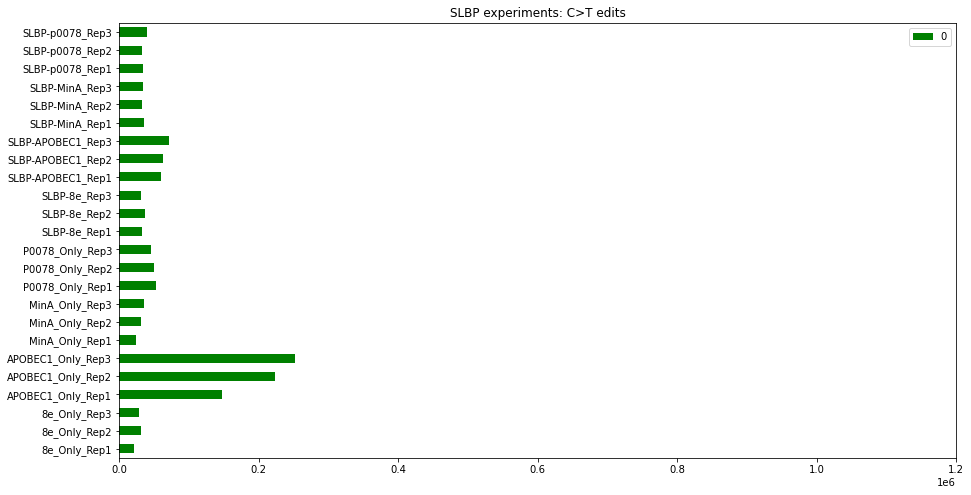

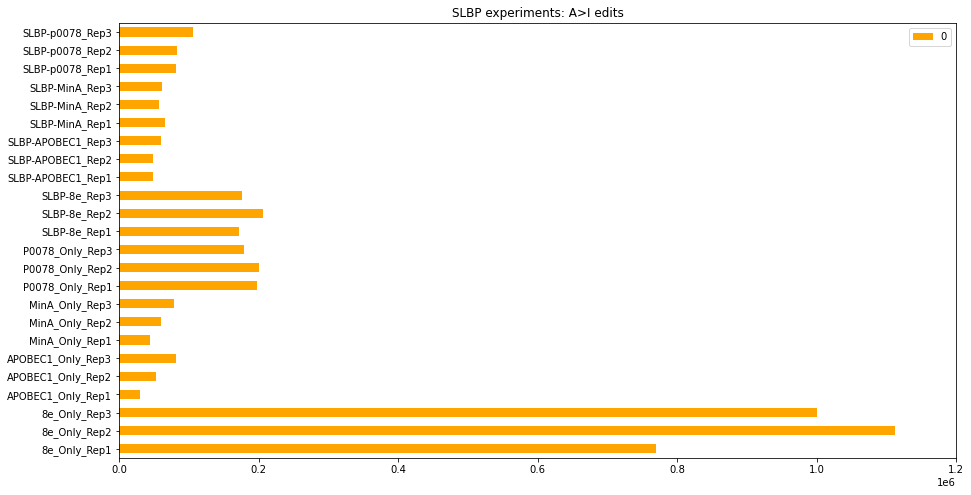

In [12]:
xlim = 1200000
slbp_ct_edit_count_df = pd.DataFrame.from_dict(slbp_edit_count_ct, orient='index')
slbp_ct_edit_count_df = slbp_ct_edit_count_df.loc[sorted(slbp_ct_edit_count_df.index)]
slbp_ai_edit_count_df = pd.DataFrame.from_dict(slbp_edit_count_ai, orient='index')
slbp_ai_edit_count_df = slbp_ai_edit_count_df.loc[sorted(slbp_ai_edit_count_df.index)]
slbp_ct_edit_count_df.plot(kind='barh', figsize=(15, 8), color='green', xlim=(0, xlim))
plt.title("SLBP experiments: C>T edits")
slbp_ai_edit_count_df.plot(kind='barh', figsize=(15, 8), color='orange', xlim=(0, xlim))
plt.title("SLBP experiments: A>I edits")


# Load peak files

In [13]:
from collections import defaultdict
import os

peak_file_dict = defaultdict(lambda:defaultdict(lambda:{}))
one_to_one_dict = defaultdict()
peak_count_dict = defaultdict()

min_score = 0
for f in sorted(glob('*peakcalling_outputs*/peak_calling/*.scored.tsv')):
    size_mb = os.path.getsize(f)/1000000
    rbp = f.split('_')[1]
    edit_type = f.split('/')[0].split('_')[-1]
    label = f.split('/')[-1].split('_merged')[0]
    label = label.replace('p0078', 'P0078')
    
    if 'Rep' in label:
        label_name = label.split('_Rep')[0]
        rep = label.split('_Rep')[1]
    else:
        label_name = label.split('_R')[0]
        rep = label.split('_R')[1]
    
    new_label = '{}_{}_{}'.format(rbp, edit_type, label_name)
    
    print(rbp, edit_type, label, label_name, rep, size_mb, 'MB')
    peak_file_dict[new_label][rep] = f
    
    df = pd.read_csv(f, index_col=0, sep='\t')
    df = df[df.score > min_score]
    one_to_one_dict['{}_{}'.format(new_label, rep)] = df
    peak_count_dict['{}_{}'.format(new_label, rep)] = len(df)

RBFOX2 ct 8e_alone_R1 8e_alone 1 4.055945 MB
RBFOX2 ct 8e_alone_R2 8e_alone 2 3.123398 MB
RBFOX2 ct 8e_alone_R3 8e_alone 3 1.26451 MB
RBFOX2 ct APOBEC1_alone_R1 APOBEC1_alone 1 3.538473 MB
RBFOX2 ct APOBEC1_alone_R2 APOBEC1_alone 2 3.710425 MB
RBFOX2 ct APOBEC1_alone_R3 APOBEC1_alone 3 2.371556 MB
RBFOX2 ct FOX2-8e_R1 FOX2-8e 1 4.13529 MB
RBFOX2 ct FOX2-8e_R2 FOX2-8e 2 4.468237 MB
RBFOX2 ct FOX2-8e_R3 FOX2-8e 3 3.693695 MB
RBFOX2 ct FOX2-APOBEC1_R1 FOX2-APOBEC1 1 2.950608 MB
RBFOX2 ct FOX2-APOBEC1_R2 FOX2-APOBEC1 2 3.075715 MB
RBFOX2 ct FOX2-APOBEC1_R3 FOX2-APOBEC1 3 2.345024 MB
RBFOX2 ct FOX2-MinA_R1 FOX2-MinA 1 3.725526 MB
RBFOX2 ct FOX2-MinA_R2 FOX2-MinA 2 3.450339 MB
RBFOX2 ct FOX2-MinA_R3 FOX2-MinA 3 1.908171 MB
RBFOX2 ct FOX2-P0078_R2 FOX2-P0078 2 3.424484 MB
RBFOX2 ct FOX2-P0078_R3 FOX2-P0078 3 3.521751 MB
RBFOX2 ct FOX2-P0078_R1 FOX2-P0078 1 2.979599 MB
RBFOX2 ct MinA_alone_R1 MinA_alone 1 3.272398 MB
RBFOX2 ct MinA_alone_R2 MinA_alone 2 3.887393 MB
RBFOX2 ct MinA_alone_R3 MinA

/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SLBP ct MinA_Only_Rep3 MinA_Only 3 4.937184 MB
SLBP ct P0078_Only_Rep1 P0078_Only 1 5.639007 MB
SLBP ct P0078_Only_Rep2 P0078_Only 2 5.719421 MB


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SLBP ct P0078_Only_Rep3 P0078_Only 3 5.211753 MB
SLBP ct SLBP-8e_Rep1 SLBP-8e 1 4.288804 MB
SLBP ct SLBP-8e_Rep2 SLBP-8e 2 4.505795 MB
SLBP ct SLBP-8e_Rep3 SLBP-8e 3 4.16851 MB
SLBP ct SLBP-APOBEC1_Rep1 SLBP-APOBEC1 1 4.463418 MB
SLBP ct SLBP-APOBEC1_Rep2 SLBP-APOBEC1 2 4.683877 MB
SLBP ct SLBP-APOBEC1_Rep3 SLBP-APOBEC1 3 5.233333 MB
SLBP ct SLBP-MinA_Rep1 SLBP-MinA 1 4.399573 MB
SLBP ct SLBP-MinA_Rep2 SLBP-MinA 2 4.121968 MB
SLBP ct SLBP-MinA_Rep3 SLBP-MinA 3 4.150755 MB
SLBP ct SLBP-P0078_Rep1 SLBP-P0078 1 4.200282 MB
SLBP ct SLBP-P0078_Rep2 SLBP-P0078 2 4.057124 MB
SLBP ct SLBP-P0078_Rep3 SLBP-P0078 3 4.597005 MB
RBFOX2 ai 8e_alone_R1 8e_alone 1 8.821214 MB


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


RBFOX2 ai 8e_alone_R2 8e_alone 2 7.959364 MB
RBFOX2 ai 8e_alone_R3 8e_alone 3 4.923207 MB
RBFOX2 ai APOBEC1_alone_R1 APOBEC1_alone 1 0.354112 MB
RBFOX2 ai APOBEC1_alone_R2 APOBEC1_alone 2 0.440969 MB
RBFOX2 ai APOBEC1_alone_R3 APOBEC1_alone 3 0.209679 MB
RBFOX2 ai FOX2-8e_R1 FOX2-8e 1 6.104934 MB


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


RBFOX2 ai FOX2-8e_R2 FOX2-8e 2 6.585856 MB
RBFOX2 ai FOX2-8e_R3 FOX2-8e 3 5.164659 MB


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


RBFOX2 ai FOX2-APOBEC1_R1 FOX2-APOBEC1 1 0.346598 MB
RBFOX2 ai FOX2-APOBEC1_R2 FOX2-APOBEC1 2 0.408966 MB
RBFOX2 ai FOX2-APOBEC1_R3 FOX2-APOBEC1 3 0.296297 MB
RBFOX2 ai FOX2-MinA_R1 FOX2-MinA 1 1.008796 MB
RBFOX2 ai FOX2-MinA_R2 FOX2-MinA 2 1.148196 MB
RBFOX2 ai FOX2-MinA_R3 FOX2-MinA 3 0.75041 MB
RBFOX2 ai FOX2-P0078_R2 FOX2-P0078 2 3.511304 MB
RBFOX2 ai FOX2-P0078_R3 FOX2-P0078 3 3.570185 MB
RBFOX2 ai FOX2-P0078_R1 FOX2-P0078 1 2.791508 MB
RBFOX2 ai MinA_alone_R1 MinA_alone 1 0.504395 MB
RBFOX2 ai MinA_alone_R2 MinA_alone 2 0.591994 MB
RBFOX2 ai MinA_alone_R3 MinA_alone 3 0.393401 MB
RBFOX2 ai P0078_alone_R1 P0078_alone 1 3.936812 MB
RBFOX2 ai P0078_alone_R2 P0078_alone 2 4.009251 MB
RBFOX2 ai P0078_alone_R3 P0078_alone 3 3.12754 MB
SLBP ai 8e_Only_Rep1 8e_Only 1 8.024862 MB
SLBP ai 8e_Only_Rep2 8e_Only 2 11.790157 MB


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SLBP ai 8e_Only_Rep3 8e_Only 3 9.95217 MB
SLBP ai APOBEC1_Only_Rep1 APOBEC1_Only 1 0.45454 MB
SLBP ai APOBEC1_Only_Rep2 APOBEC1_Only 2 0.953509 MB
SLBP ai APOBEC1_Only_Rep3 APOBEC1_Only 3 2.711164 MB
SLBP ai MinA_Only_Rep1 MinA_Only 1 0.665887 MB
SLBP ai MinA_Only_Rep2 MinA_Only 2 0.787013 MB
SLBP ai MinA_Only_Rep3 MinA_Only 3 1.220832 MB
SLBP ai P0078_Only_Rep1 P0078_Only 1 4.796763 MB
SLBP ai P0078_Only_Rep2 P0078_Only 2 4.618164 MB
SLBP ai P0078_Only_Rep3 P0078_Only 3 4.208891 MB
SLBP ai SLBP-8e_Rep1 SLBP-8e 1 3.01742 MB
SLBP ai SLBP-8e_Rep2 SLBP-8e 2 3.742861 MB
SLBP ai SLBP-8e_Rep3 SLBP-8e 3 3.077229 MB
SLBP ai SLBP-APOBEC1_Rep1 SLBP-APOBEC1 1 0.887428 MB
SLBP ai SLBP-APOBEC1_Rep2 SLBP-APOBEC1 2 0.978756 MB
SLBP ai SLBP-APOBEC1_Rep3 SLBP-APOBEC1 3 1.076815 MB
SLBP ai SLBP-MinA_Rep1 SLBP-MinA 1 1.136232 MB
SLBP ai SLBP-MinA_Rep2 SLBP-MinA 2 0.966943 MB
SLBP ai SLBP-MinA_Rep3 SLBP-MinA 3 1.251276 MB
SLBP ai SLBP-P0078_Rep1 SLBP-P0078 1 1.769363 MB
SLBP ai SLBP-P0078_Rep2 SLBP-P0078 

# Overall peak info

In [14]:
peak_count_df = pd.DataFrame.from_dict(peak_count_dict, orient='index')
peak_count_df = peak_count_df.loc[sorted(peak_count_df.index)]

peak_count_by_experiment = defaultdict(lambda:[])
for r in peak_count_df.iterrows():
    label = r[0][:-2]
    count = r[1][0]
    peak_count_by_experiment[label].append(count)

In [15]:
mypal = {}
for k in peak_count_by_experiment.keys():
    if 'ai' in k:
        mypal[k] = 'orange'
    elif 'ct' in k:
        mypal[k] = 'green'

In [16]:
peak_count_by_experiment

defaultdict(<function __main__.<lambda>()>,
            {'RBFOX2_ai_8e_alone': [59805, 54091, 33504],
             'RBFOX2_ai_APOBEC1_alone': [2420, 2994, 1428],
             'RBFOX2_ai_FOX2-8e': [41401, 44630, 35056],
             'RBFOX2_ai_FOX2-APOBEC1': [2366, 2787, 2024],
             'RBFOX2_ai_FOX2-MinA': [6823, 7788, 5082],
             'RBFOX2_ai_FOX2-P0078': [18931, 23755, 24169],
             'RBFOX2_ai_MinA_alone': [3444, 4038, 2664],
             'RBFOX2_ai_P0078_alone': [26567, 27077, 21192],
             'RBFOX2_ct_8e_alone': [25138, 19441, 7831],
             'RBFOX2_ct_APOBEC1_alone': [21958, 22977, 14797],
             'RBFOX2_ct_FOX2-8e': [25617, 27638, 22920],
             'RBFOX2_ct_FOX2-APOBEC1': [18309, 19104, 14590],
             'RBFOX2_ct_FOX2-MinA': [23085, 21367, 11848],
             'RBFOX2_ct_FOX2-P0078': [18509, 21232, 21849],
             'RBFOX2_ct_MinA_alone': [20263, 24053, 11951],
             'RBFOX2_ct_P0078_alone': [27673, 27689, 18892],
         

Text(0, 0.5, 'Experiment')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


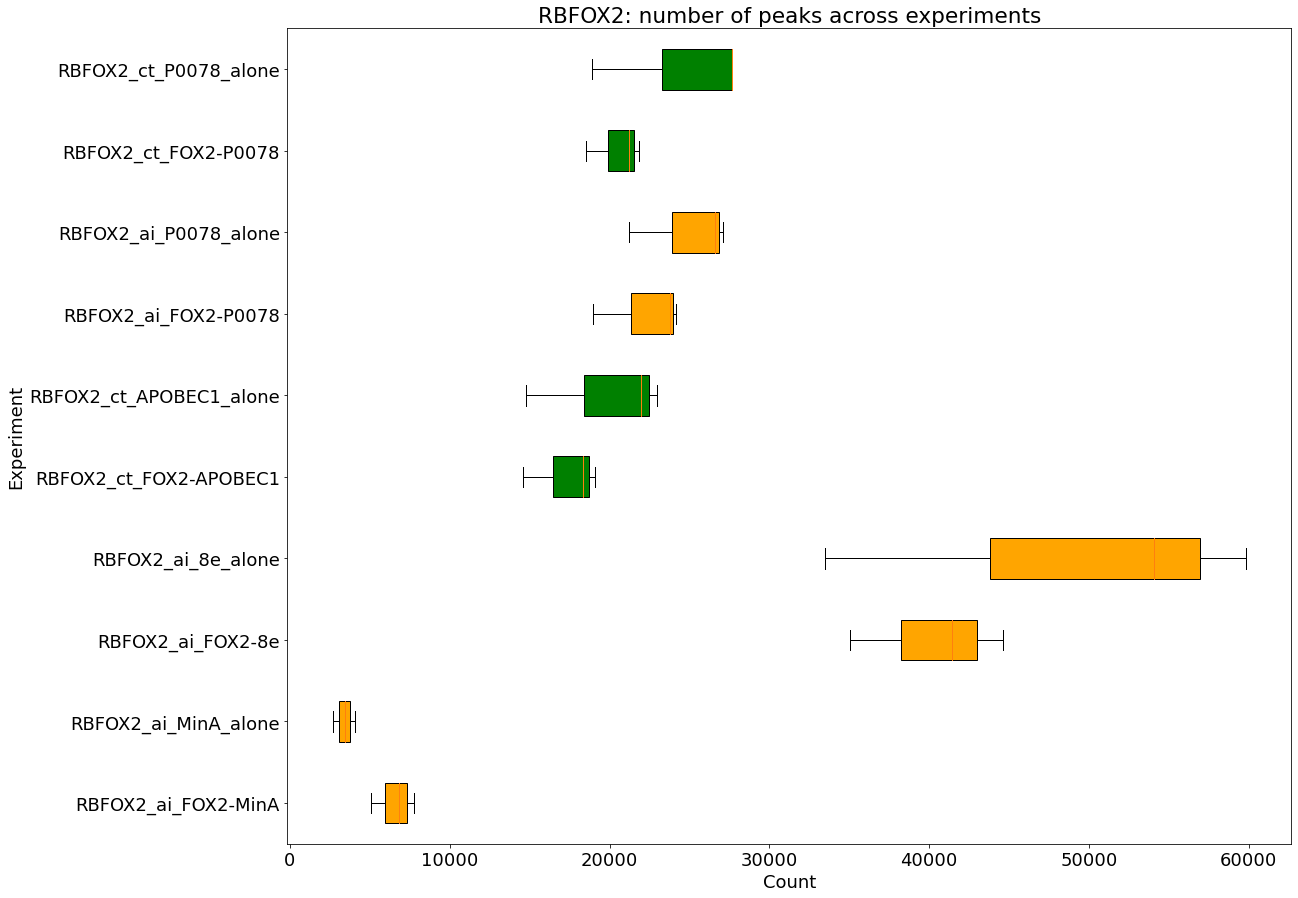

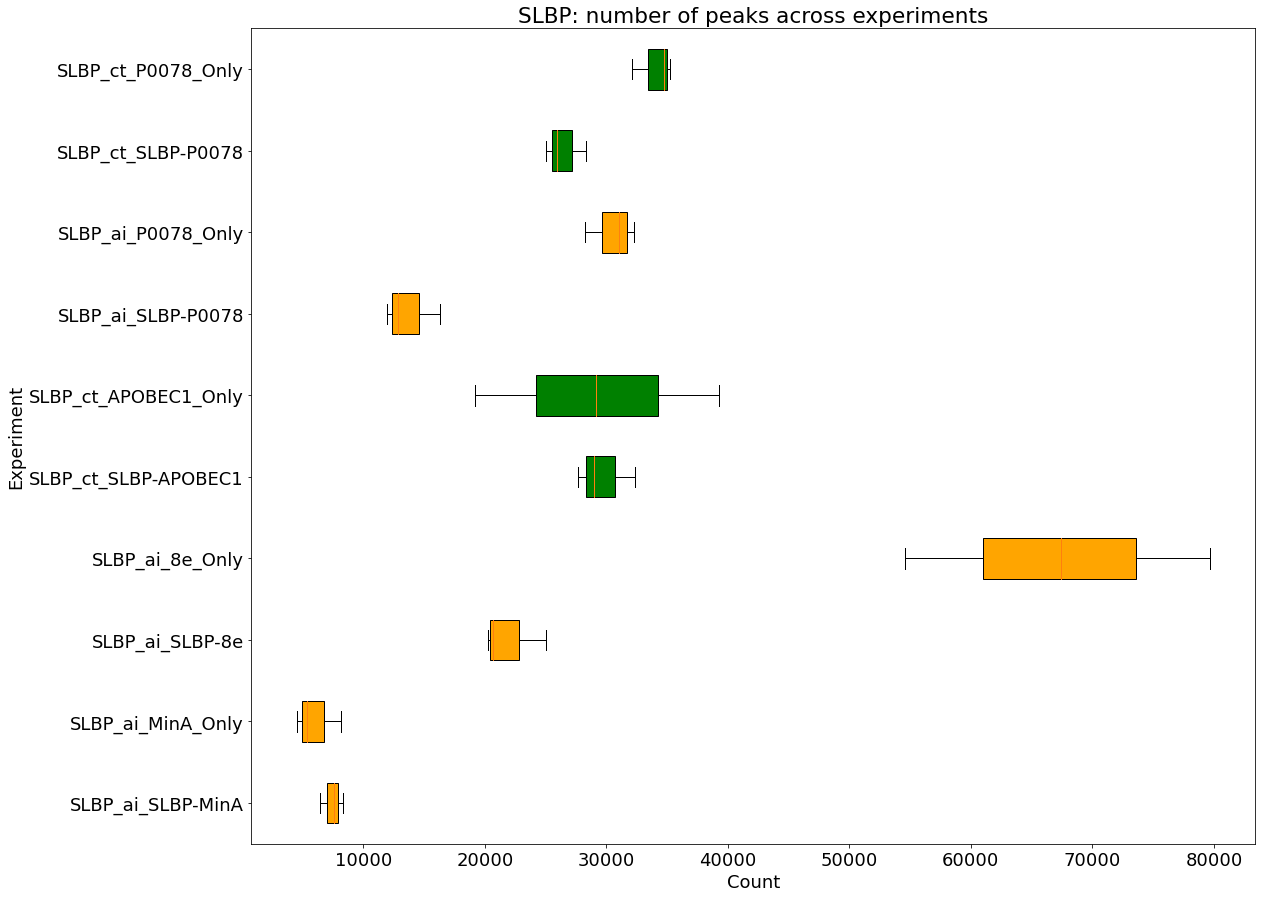

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

rbfox2_to_plot_together_label = ['RBFOX2_ai_FOX2-MinA',
                          'RBFOX2_ai_MinA_alone',
                          'RBFOX2_ai_FOX2-8e',
                          'RBFOX2_ai_8e_alone',
                          'RBFOX2_ct_FOX2-APOBEC1',
                          'RBFOX2_ct_APOBEC1_alone',
                          'RBFOX2_ai_FOX2-P0078',
                          'RBFOX2_ai_P0078_alone',
                        'RBFOX2_ct_FOX2-P0078',
                          'RBFOX2_ct_P0078_alone'
                                ]

slbp_to_plot_together_label = ['SLBP_ai_SLBP-MinA',
                          'SLBP_ai_MinA_Only',
                          'SLBP_ai_SLBP-8e',
                          'SLBP_ai_8e_Only',
                          'SLBP_ct_SLBP-APOBEC1',
                          'SLBP_ct_APOBEC1_Only',
                          'SLBP_ai_SLBP-P0078',
                          'SLBP_ai_P0078_Only',
                         'SLBP_ct_SLBP-P0078',
                          'SLBP_ct_P0078_Only'
                                ]

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(18, 15))
labels = [l for l in rbfox2_to_plot_together_label]

g = ax1.boxplot([peak_count_by_experiment.get(l) for l in rbfox2_to_plot_together_label], labels=labels, vert=False, patch_artist=True)

for label, patch in zip(labels, g['boxes']):
    patch.set_facecolor(mypal.get(label))

plt.title("RBFOX2: number of peaks across experiments")
plt.xlabel("Count")
plt.ylabel("Experiment")



fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(18, 15))
labels = [l for l in slbp_to_plot_together_label]

g = ax1.boxplot([peak_count_by_experiment.get(l) for l in slbp_to_plot_together_label], labels=labels, vert=False, patch_artist=True)

for label, patch in zip(labels, g['boxes']):
    patch.set_facecolor(mypal.get(label))

plt.title("SLBP: number of peaks across experiments")
plt.xlabel("Count")
plt.ylabel("Experiment")

# Assess presence of all three reps for each experiment

In [18]:
experiments_with_all_three = []
for experiment, reps in peak_file_dict.items():
    reps_present = list(sorted(reps.keys()))
    if len(reps_present) < 3:
        print(experiment, reps_present)
    else:
        experiments_with_all_three.append(experiment)

In [19]:
experiments_with_all_three

['RBFOX2_ct_8e_alone',
 'RBFOX2_ct_APOBEC1_alone',
 'RBFOX2_ct_FOX2-8e',
 'RBFOX2_ct_FOX2-APOBEC1',
 'RBFOX2_ct_FOX2-MinA',
 'RBFOX2_ct_FOX2-P0078',
 'RBFOX2_ct_MinA_alone',
 'RBFOX2_ct_P0078_alone',
 'SLBP_ct_8e_Only',
 'SLBP_ct_APOBEC1_Only',
 'SLBP_ct_MinA_Only',
 'SLBP_ct_P0078_Only',
 'SLBP_ct_SLBP-8e',
 'SLBP_ct_SLBP-APOBEC1',
 'SLBP_ct_SLBP-MinA',
 'SLBP_ct_SLBP-P0078',
 'RBFOX2_ai_8e_alone',
 'RBFOX2_ai_APOBEC1_alone',
 'RBFOX2_ai_FOX2-8e',
 'RBFOX2_ai_FOX2-APOBEC1',
 'RBFOX2_ai_FOX2-MinA',
 'RBFOX2_ai_FOX2-P0078',
 'RBFOX2_ai_MinA_alone',
 'RBFOX2_ai_P0078_alone',
 'SLBP_ai_8e_Only',
 'SLBP_ai_APOBEC1_Only',
 'SLBP_ai_MinA_Only',
 'SLBP_ai_P0078_Only',
 'SLBP_ai_SLBP-8e',
 'SLBP_ai_SLBP-APOBEC1',
 'SLBP_ai_SLBP-MinA',
 'SLBP_ai_SLBP-P0078']

# Assess peak overlaps, generate consensus peak bed file

In [21]:
cols_to_keep = ['chrom', 'start', 'end', 'edit_fraction', 'label', 'strand',
                                                        'target_bases', 'edited_bases', 'num_edited_reads', 'total_reads_in_region', 
                                                        'fraction_reads_edited', 'mean_depth', 'num_substrate_bases', 'score'
                                                       ]

In [22]:
import pybedtools

bed_dict = defaultdict(lambda:defaultdict(lambda:{}))
min_score = 0

def get_bedtool_from_filepath(filepath):
    rep_df = pd.read_csv(filepath, sep='\t', index_col=0)
    rep_df[rep_df.score > min_score]
    rep_df['label'] = rep_df.index
    rep_bed = pybedtools.BedTool.from_dataframe(rep_df[cols_to_keep])
    return rep_bed

for experiment in experiments_with_all_three:
    print(experiment)
    rep1 = get_bedtool_from_filepath(peak_file_dict.get(experiment).get('1'))
    rep2 = get_bedtool_from_filepath(peak_file_dict.get(experiment).get('2'))
    rep3 = get_bedtool_from_filepath(peak_file_dict.get(experiment).get('3'))
    
    print('\t', len(rep1), len(rep2), len(rep3))

    # Intersect
    rep1_rep2 = rep1.intersect(rep2, wa=True, u=True, s=True)
    in_all_three = rep1_rep2.intersect(rep3, wa=True, u=True, s=True)
    print('\t\t', len(in_all_three))
    bed_dict[experiment] = in_all_three

RBFOX2_ct_8e_alone
	 25138 19441 7831
		 382
RBFOX2_ct_APOBEC1_alone
	 21958 22977 14797
		 2047
RBFOX2_ct_FOX2-8e
	 25617 27638 22920
		 893
RBFOX2_ct_FOX2-APOBEC1
	 18309 19104 14590
		 2257
RBFOX2_ct_FOX2-MinA
	 23085 21367 11848
		 513
RBFOX2_ct_FOX2-P0078
	 18509 21232 21849
		 1622
RBFOX2_ct_MinA_alone
	 20263 24053 11951
		 470
RBFOX2_ct_P0078_alone
	 27673 27689 18892
		 1911
SLBP_ct_8e_Only
	 18183 25506 24474
		 588
SLBP_ct_APOBEC1_Only


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


	 19201 29131 39300
		 2852
SLBP_ct_MinA_Only
	 20503 25465 30449
		 714
SLBP_ct_P0078_Only


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


	 34741 35249 32140
		 2464
SLBP_ct_SLBP-8e
	 26478 27777 25752
		 664
SLBP_ct_SLBP-APOBEC1
	 27638 28981 32349
		 1337
SLBP_ct_SLBP-MinA
	 27126 25408 25623
		 681
SLBP_ct_SLBP-P0078
	 25962 25033 28344
		 959
RBFOX2_ai_8e_alone


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


	 59805 54091 33504
		 10809
RBFOX2_ai_APOBEC1_alone
	 2420 2994 1428
		 488
RBFOX2_ai_FOX2-8e


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


	 41401 44630 35056
		 9403
RBFOX2_ai_FOX2-APOBEC1
	 2366 2787 2024
		 783
RBFOX2_ai_FOX2-MinA
	 6823 7788 5082
		 933
RBFOX2_ai_FOX2-P0078
	 18931 23755 24169
		 4328
RBFOX2_ai_MinA_alone
	 3444 4038 2664
		 545
RBFOX2_ai_P0078_alone
	 26567 27077 21192
		 5251
SLBP_ai_8e_Only


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


	 54584 79656 67434
		 15668
SLBP_ai_APOBEC1_Only
	 3070 6330 17902
		 1172
SLBP_ai_MinA_Only
	 4513 5328 8153
		 1224
SLBP_ai_P0078_Only
	 32264 31046 28273
		 5771
SLBP_ai_SLBP-8e
	 20221 25031 20645
		 2770
SLBP_ai_SLBP-APOBEC1
	 5875 6484 7140
		 1499
SLBP_ai_SLBP-MinA
	 7552 6437 8307
		 1665
SLBP_ai_SLBP-P0078
	 11904 12828 16281
		 2405


# overlap calculation

# Combine p0078 AI and CT bed peaks

In [23]:
print([k for k in bed_dict.keys() if '78' in k])

['RBFOX2_ct_FOX2-P0078', 'RBFOX2_ct_P0078_alone', 'SLBP_ct_P0078_Only', 'SLBP_ct_SLBP-P0078', 'RBFOX2_ai_FOX2-P0078', 'RBFOX2_ai_P0078_alone', 'SLBP_ai_P0078_Only', 'SLBP_ai_SLBP-P0078']


In [24]:
len(bed_dict.get('RBFOX2_ai_FOX2-P0078'))

4328

In [25]:


combinations = {
    'SLBP_both_P0078_Only': ['SLBP_ct_P0078_Only', 'SLBP_ai_P0078_Only'],
    'SLBP_both_SLBP-P0078': ['SLBP_ct_SLBP-P0078', 'SLBP_ai_SLBP-P0078'],
    'RBFOX2_both_P0078_alone': ['RBFOX2_ct_P0078_alone', 'RBFOX2_ai_P0078_alone'],
    'RBFOX2_both_FOX2-P0078': ['RBFOX2_ct_FOX2-P0078', 'RBFOX2_ai_FOX2-P0078']
}

for new_label, combination in combinations.items():
    print(new_label, combination)
    ct = bed_dict.get(combination[0]).to_dataframe(names=cols_to_keep)
    ai = bed_dict.get(combination[1]).to_dataframe(names=cols_to_keep)
    
    print(len(ct), len(ai))
    combined = pd.concat([ct, ai])
    print(len(combined))
    
    combined_bed = pybedtools.BedTool.from_dataframe(combined)
    
    combined_sorted_merged_bed = combined_bed.sort().merge(s=True, c=(4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14), o=['mean', 'distinct', 'distinct', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean', 'mean'])
    print(len(combined_sorted_merged_bed))
    bed_dict[new_label] = combined_sorted_merged_bed

SLBP_both_P0078_Only ['SLBP_ct_P0078_Only', 'SLBP_ai_P0078_Only']
2464 5771
8235
7715
SLBP_both_SLBP-P0078 ['SLBP_ct_SLBP-P0078', 'SLBP_ai_SLBP-P0078']
959 2405
3364
3234
RBFOX2_both_P0078_alone ['RBFOX2_ct_P0078_alone', 'RBFOX2_ai_P0078_alone']
1911 5251
7162
6667
RBFOX2_both_FOX2-P0078 ['RBFOX2_ct_FOX2-P0078', 'RBFOX2_ai_FOX2-P0078']
1622 4328
5950
5476


Text(0, 0.5, 'Experiment')

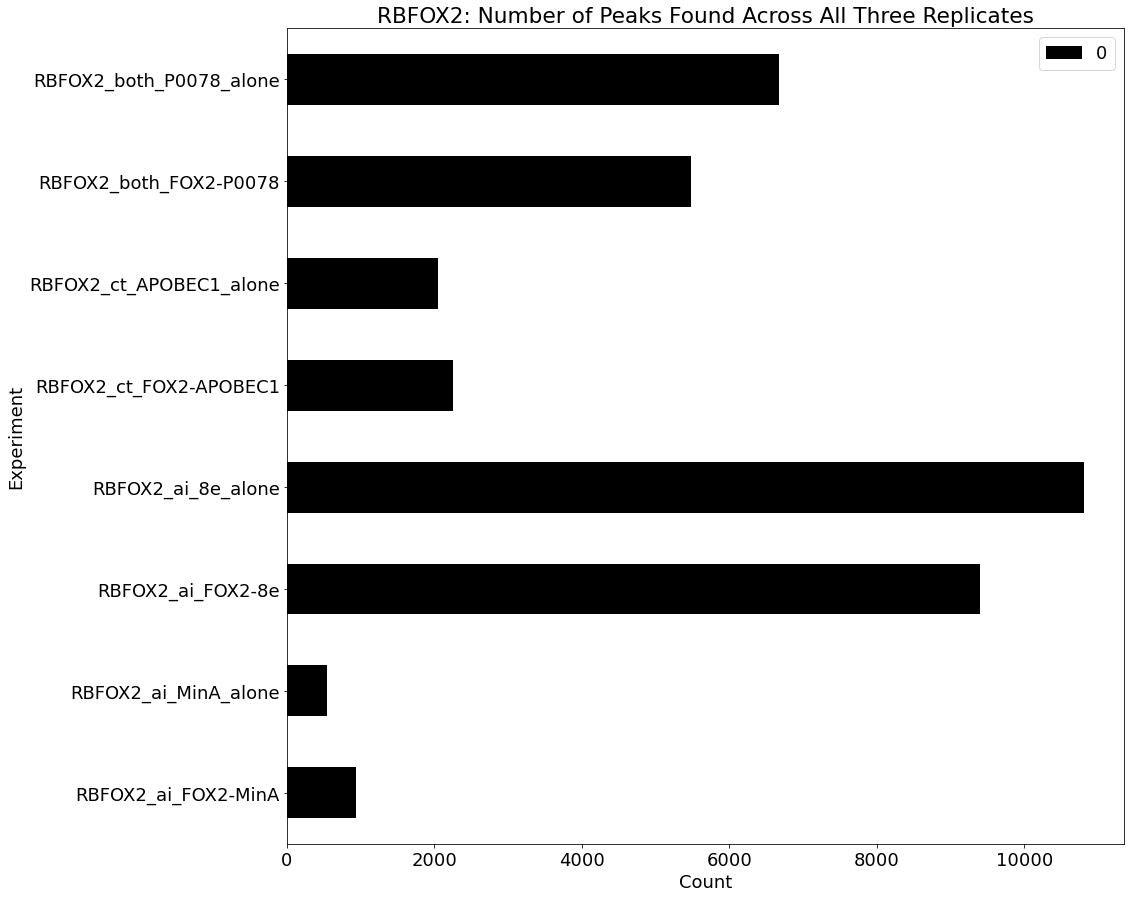

<Figure size 432x288 with 0 Axes>

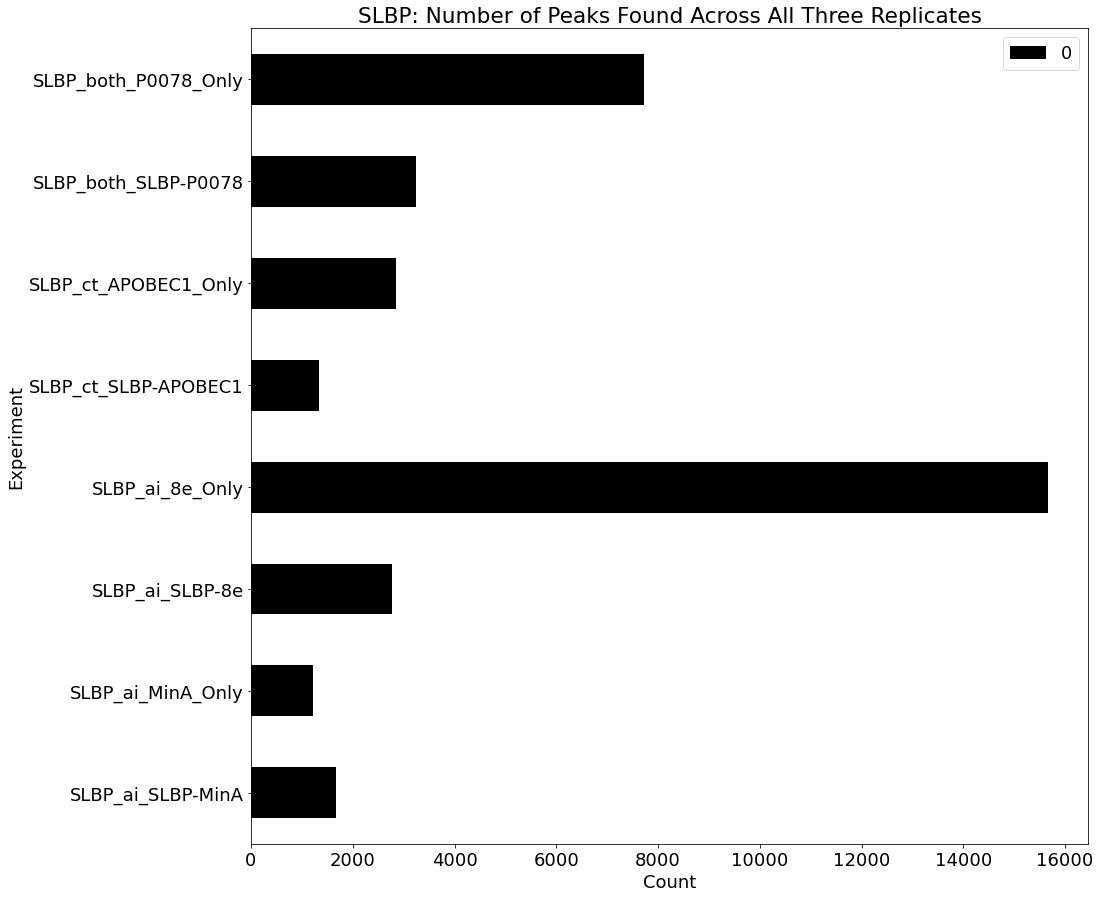

In [27]:
num_overlapped_peaks = {}

rbfox2_to_plot_together_label = ['RBFOX2_ai_FOX2-MinA',
                          'RBFOX2_ai_MinA_alone',
                          'RBFOX2_ai_FOX2-8e',
                          'RBFOX2_ai_8e_alone',
                          'RBFOX2_ct_FOX2-APOBEC1',
                          'RBFOX2_ct_APOBEC1_alone',
                          'RBFOX2_both_FOX2-P0078',
                          'RBFOX2_both_P0078_alone'
                                ]

slbp_to_plot_together_label = ['SLBP_ai_SLBP-MinA',
                          'SLBP_ai_MinA_Only',
                          'SLBP_ai_SLBP-8e',
                          'SLBP_ai_8e_Only',
                          'SLBP_ct_SLBP-APOBEC1',
                          'SLBP_ct_APOBEC1_Only',
                          'SLBP_both_SLBP-P0078',
                          'SLBP_both_P0078_Only'
                                ]

for experiment, bedfile in bed_dict.items():
    num_overlapped_peaks[experiment] = len(bedfile)
    
intersection_len_df = pd.DataFrame.from_dict(num_overlapped_peaks, orient='index')
intersection_len_df = intersection_len_df.loc[sorted(intersection_len_df.index)]
intersection_len_df.loc[rbfox2_to_plot_together_label].plot(kind='barh', figsize=(15, 15), color='k')
plt.title("RBFOX2: Number of Peaks Found Across All Three Replicates")
plt.xlabel("Count")
plt.ylabel("Experiment")

plt.figure()
intersection_len_df.loc[slbp_to_plot_together_label].plot(kind='barh', figsize=(15, 15), color='k')
plt.title("SLBP: Number of Peaks Found Across All Three Replicates")
plt.xlabel("Count")
plt.ylabel("Experiment")

In [136]:
intersection_len_df.loc[[l for l in rbfox2_to_plot_together_label if 'alone' in l]]

,0
RBFOX2_ai_MinA_alone,545
RBFOX2_ai_8e_alone,10809
RBFOX2_ct_APOBEC1_alone,2047
RBFOX2_both_P0078_alone,6667


In [28]:
import seaborn as sns

high_conf_df_dict = {}
for experiment, bedfile in bed_dict.items():
    high_conf_df = bedfile.to_dataframe(names=cols_to_keep)
    high_conf_df_dict[experiment] = high_conf_df
    
    high_conf_df.to_csv('6_overlapped_confident_peaks/{}.tsv'.format(experiment), sep='\t')
    """
    plt.figure()
    plt.xlim(0.97, 1)
    plt.title(experiment + 'score')
    sns.boxplot(data=[pd.read_csv(peak_file_dict.get(experiment).get('1'), sep='\t').score, 
                      pd.read_csv(peak_file_dict.get(experiment).get('2'), sep='\t').score,
                      pd.read_csv(peak_file_dict.get(experiment).get('3'), sep='\t').score,
                      df.score], showfliers=False)
    
    plt.figure()
    plt.xlim(0.97, 1)
    plt.title(experiment + ' edit fraction')
    sns.boxplot(data=[pd.read_csv(peak_file_dict.get(experiment).get('1'), sep='\t').edit_fraction, 
                      pd.read_csv(peak_file_dict.get(experiment).get('2'), sep='\t').edit_fraction,
                      pd.read_csv(peak_file_dict.get(experiment).get('3'), sep='\t').edit_fraction,
                      df.edit_fraction], showfliers=False)
    """

In [29]:
lengths = {}

high_conf_dfs = {}
for experiment, bedfile in bed_dict.items():
    high_conf_df = bedfile.to_dataframe(names=cols_to_keep)
    high_conf_dfs[experiment] = high_conf_df
    high_conf_df['length'] = high_conf_df['end'] - high_conf_df['start']
    lengths[experiment] = list(high_conf_df['length'])

Text(0.5, 1.0, 'Peak size distribution across experiments')

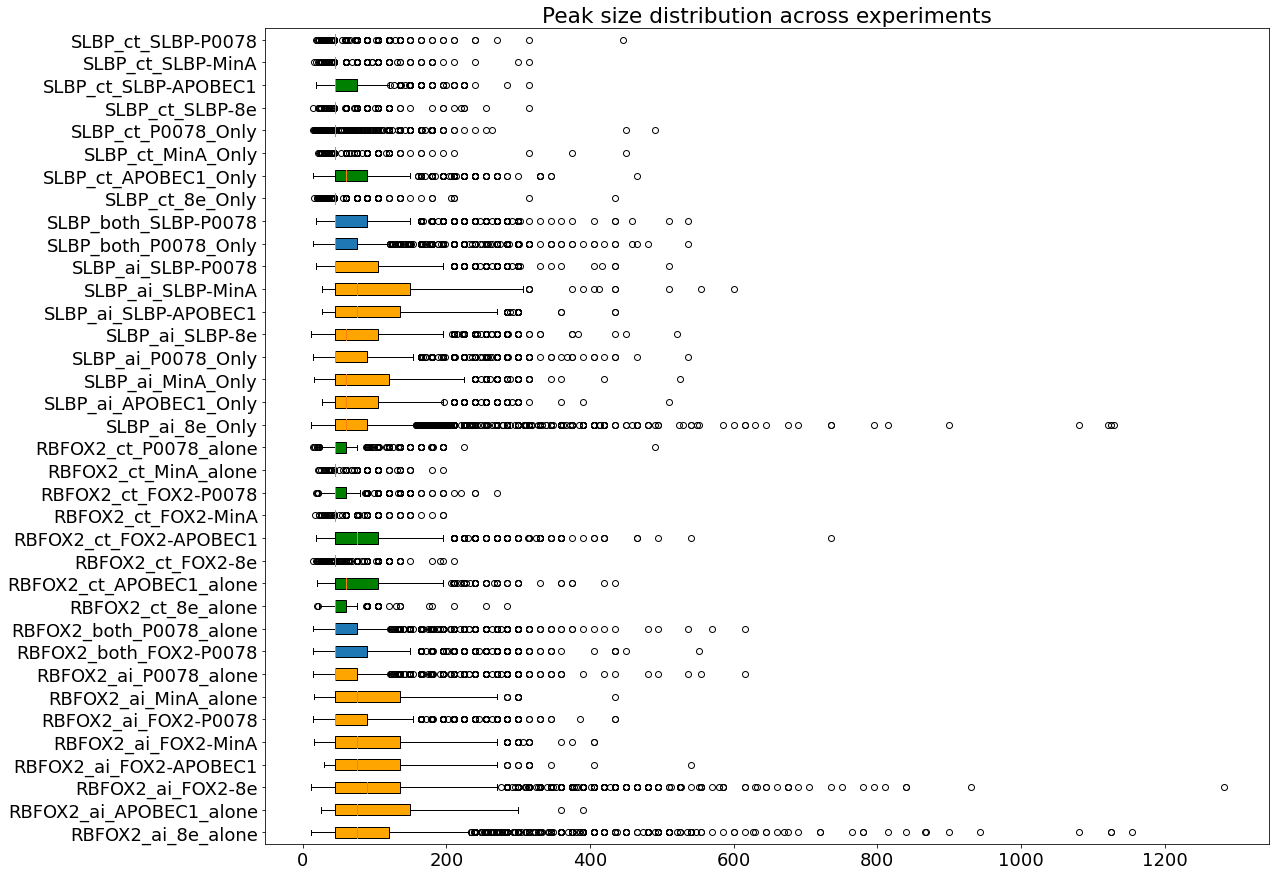

In [30]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(18, 15))
labels = sorted(lengths.keys())

g = ax1.boxplot([lengths.get(l) for l in labels], labels=labels, vert=False, patch_artist=True)

for label, patch in zip(labels, g['boxes']):
    patch.set_facecolor(mypal.get(label))

plt.title("Peak size distribution across experiments")

# Make peaks with enzyme-only subtracted

In [31]:
cols_to_keep

['chrom',
 'start',
 'end',
 'edit_fraction',
 'label',
 'strand',
 'target_bases',
 'edited_bases',
 'num_edited_reads',
 'total_reads_in_region',
 'fraction_reads_edited',
 'mean_depth',
 'num_substrate_bases',
 'score']

In [32]:
enzyme_only_keys = [k for k in bed_dict.keys() if 'Only' in k or 'alone' in k]
other_keys = [k for k in bed_dict.keys() if k not in enzyme_only_keys]

In [33]:
foreground_to_background = {}
for k in other_keys:
    rbp = k.split('_')[0]
    edit_type = k.split('_')[1]
    enzyme = k.split('-')[-1]
    
    if rbp == 'RBFOX2':
        background_key = '{}_{}_{}_alone'.format(rbp, edit_type, enzyme)
    else:
        background_key =  '{}_{}_{}_Only'.format(rbp, edit_type, enzyme)
        
    assert(background_key in enzyme_only_keys)
    
    foreground_to_background[k] = background_key

In [34]:
subtracted_dfs = {}
for f, b in foreground_to_background.items():
    print(f)
    foreground_bed = bed_dict.get(f)
    background_bed = bed_dict.get(b)
    
    print('\tForeground: {}, Background {}'.format(len(foreground_bed),
                                                 len(background_bed)
                                                ))
    
    subtracted_bed = foreground_bed.subtract(background_bed, s=True, f=.75)
    print("\t\tAfter subtract: {}\n".format(len(subtracted_bed)))
    subtracted_df = subtracted_bed.to_dataframe()
    subtracted_df.columns = cols_to_keep
    subtracted_dfs['{}_cleaned'.format(f)] = subtracted_df

RBFOX2_ct_FOX2-8e
	Foreground: 893, Background 382
		After subtract: 730



/home/ekofman/new_anaconda3/lib/python3.7/site-packages/pybedtools/bedtool.py:3681: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 14 fields; you can supply custom names with the `names` kwarg
  "`names` kwarg" % (self.file_type, _names, self.field_count())
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/pybedtools/bedtool.py:3681: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 14 fields; you can supply custom names with the `names` kwarg
  "`names` kwarg" % (self.file_type, _names, self.field_count())
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/pybedtools/bedtool.py:3681: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 't

RBFOX2_ct_FOX2-APOBEC1
	Foreground: 2257, Background 2047
		After subtract: 1898

RBFOX2_ct_FOX2-MinA
	Foreground: 513, Background 470
		After subtract: 339

RBFOX2_ct_FOX2-P0078
	Foreground: 1622, Background 1911
		After subtract: 1152

SLBP_ct_SLBP-8e
	Foreground: 664, Background 588
		After subtract: 403

SLBP_ct_SLBP-APOBEC1
	Foreground: 1337, Background 2852
		After subtract: 886

SLBP_ct_SLBP-MinA
	Foreground: 681, Background 714
		After subtract: 399

SLBP_ct_SLBP-P0078
	Foreground: 959, Background 2464
		After subtract: 463

RBFOX2_ai_FOX2-8e


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/pybedtools/bedtool.py:3681: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 14 fields; you can supply custom names with the `names` kwarg
  "`names` kwarg" % (self.file_type, _names, self.field_count())
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/pybedtools/bedtool.py:3681: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 14 fields; you can supply custom names with the `names` kwarg
  "`names` kwarg" % (self.file_type, _names, self.field_count())
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/pybedtools/bedtool.py:3681: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 't

	Foreground: 9403, Background 10809
		After subtract: 7883

RBFOX2_ai_FOX2-APOBEC1
	Foreground: 783, Background 488
		After subtract: 541

RBFOX2_ai_FOX2-MinA
	Foreground: 933, Background 545
		After subtract: 737

RBFOX2_ai_FOX2-P0078


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/pybedtools/bedtool.py:3681: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 14 fields; you can supply custom names with the `names` kwarg
  "`names` kwarg" % (self.file_type, _names, self.field_count())
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/pybedtools/bedtool.py:3681: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 14 fields; you can supply custom names with the `names` kwarg
  "`names` kwarg" % (self.file_type, _names, self.field_count())
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/pybedtools/bedtool.py:3681: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 't

	Foreground: 4328, Background 5251
		After subtract: 3237

SLBP_ai_SLBP-8e


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/pybedtools/bedtool.py:3681: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 14 fields; you can supply custom names with the `names` kwarg
  "`names` kwarg" % (self.file_type, _names, self.field_count())
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/pybedtools/bedtool.py:3681: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 14 fields; you can supply custom names with the `names` kwarg
  "`names` kwarg" % (self.file_type, _names, self.field_count())


	Foreground: 2770, Background 15668
		After subtract: 1869

SLBP_ai_SLBP-APOBEC1
	Foreground: 1499, Background 1172
		After subtract: 1092

SLBP_ai_SLBP-MinA
	Foreground: 1665, Background 1224
		After subtract: 1272

SLBP_ai_SLBP-P0078


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/pybedtools/bedtool.py:3681: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 14 fields; you can supply custom names with the `names` kwarg
  "`names` kwarg" % (self.file_type, _names, self.field_count())
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/pybedtools/bedtool.py:3681: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 14 fields; you can supply custom names with the `names` kwarg
  "`names` kwarg" % (self.file_type, _names, self.field_count())


	Foreground: 2405, Background 5771
		After subtract: 1181

SLBP_both_SLBP-P0078
	Foreground: 3234, Background 7715
		After subtract: 1582

RBFOX2_both_FOX2-P0078


/home/ekofman/new_anaconda3/lib/python3.7/site-packages/pybedtools/bedtool.py:3681: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 14 fields; you can supply custom names with the `names` kwarg
  "`names` kwarg" % (self.file_type, _names, self.field_count())
/home/ekofman/new_anaconda3/lib/python3.7/site-packages/pybedtools/bedtool.py:3681: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 14 fields; you can supply custom names with the `names` kwarg
  "`names` kwarg" % (self.file_type, _names, self.field_count())


	Foreground: 5476, Background 6667
		After subtract: 4004



/home/ekofman/new_anaconda3/lib/python3.7/site-packages/pybedtools/bedtool.py:3681: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 14 fields; you can supply custom names with the `names` kwarg
  "`names` kwarg" % (self.file_type, _names, self.field_count())


# How many peaks are subtracted?

In [36]:
high_conf_dfs.keys()

dict_keys(['RBFOX2_ct_8e_alone', 'RBFOX2_ct_APOBEC1_alone', 'RBFOX2_ct_FOX2-8e', 'RBFOX2_ct_FOX2-APOBEC1', 'RBFOX2_ct_FOX2-MinA', 'RBFOX2_ct_FOX2-P0078', 'RBFOX2_ct_MinA_alone', 'RBFOX2_ct_P0078_alone', 'SLBP_ct_8e_Only', 'SLBP_ct_APOBEC1_Only', 'SLBP_ct_MinA_Only', 'SLBP_ct_P0078_Only', 'SLBP_ct_SLBP-8e', 'SLBP_ct_SLBP-APOBEC1', 'SLBP_ct_SLBP-MinA', 'SLBP_ct_SLBP-P0078', 'RBFOX2_ai_8e_alone', 'RBFOX2_ai_APOBEC1_alone', 'RBFOX2_ai_FOX2-8e', 'RBFOX2_ai_FOX2-APOBEC1', 'RBFOX2_ai_FOX2-MinA', 'RBFOX2_ai_FOX2-P0078', 'RBFOX2_ai_MinA_alone', 'RBFOX2_ai_P0078_alone', 'SLBP_ai_8e_Only', 'SLBP_ai_APOBEC1_Only', 'SLBP_ai_MinA_Only', 'SLBP_ai_P0078_Only', 'SLBP_ai_SLBP-8e', 'SLBP_ai_SLBP-APOBEC1', 'SLBP_ai_SLBP-MinA', 'SLBP_ai_SLBP-P0078', 'SLBP_both_P0078_Only', 'SLBP_both_SLBP-P0078', 'RBFOX2_both_P0078_alone', 'RBFOX2_both_FOX2-P0078'])

In [68]:
counts_dict = defaultdict(lambda:{})

to_plot_together_label_cleaned = [
    'RBFOX2_ai_FOX2-MinA_cleaned',
    'RBFOX2_ai_FOX2-MinA',
    'RBFOX2_ai_FOX2-8e_cleaned',
    'RBFOX2_ai_FOX2-8e',
    'RBFOX2_ct_FOX2-APOBEC1_cleaned',
    'RBFOX2_ct_FOX2-APOBEC1',
    'RBFOX2_both_FOX2-P0078_cleaned',
    'RBFOX2_both_FOX2-P0078',
    'SLBP_ai_SLBP-MinA_cleaned',
    'SLBP_ai_SLBP-MinA',  
    'SLBP_ai_SLBP-8e_cleaned',

    'SLBP_ai_SLBP-8e',
    'SLBP_ct_SLBP-APOBEC1_cleaned',

    'SLBP_ct_SLBP-APOBEC1',
    'SLBP_both_SLBP-P0078_cleaned',

    'SLBP_both_SLBP-P0078'
]


subtracted_dfs_counts = {}
for label, df in subtracted_dfs.items():
    if label in to_plot_together_label_cleaned:
        subtracted_dfs_counts[label] = len(df)
        counts_dict[label.replace('_cleaned', '')]['subtracted'] = df
for label, df in high_conf_dfs.items():
    if label in to_plot_together_label_cleaned:
        subtracted_dfs_counts[label] = len(df)
        counts_dict[label.replace('_cleaned', '')]['original'] = df


In [38]:
subtracted_dfs_counts

{'RBFOX2_ct_FOX2-APOBEC1_cleaned': 1897,
 'SLBP_ct_SLBP-APOBEC1_cleaned': 885,
 'RBFOX2_ai_FOX2-8e_cleaned': 7882,
 'RBFOX2_ai_FOX2-MinA_cleaned': 736,
 'SLBP_ai_SLBP-8e_cleaned': 1868,
 'SLBP_ai_SLBP-MinA_cleaned': 1271,
 'SLBP_both_SLBP-P0078_cleaned': 1581,
 'RBFOX2_both_FOX2-P0078_cleaned': 4003,
 'RBFOX2_ct_FOX2-APOBEC1': 2257,
 'SLBP_ct_SLBP-APOBEC1': 1337,
 'RBFOX2_ai_FOX2-8e': 9403,
 'RBFOX2_ai_FOX2-MinA': 933,
 'SLBP_ai_SLBP-8e': 2770,
 'SLBP_ai_SLBP-MinA': 1665,
 'SLBP_both_SLBP-P0078': 3234,
 'RBFOX2_both_FOX2-P0078': 5476}

In [81]:
heights = []
labels = []
for label in to_plot_together_label_cleaned:
    if 'RBFOX' in label:
        heights.append(subtracted_dfs_counts.get(label))
        labels.append(label)

Text(0.5, 1.0, 'Number of peaks subtracted when filtering out enzyme-only peaks')

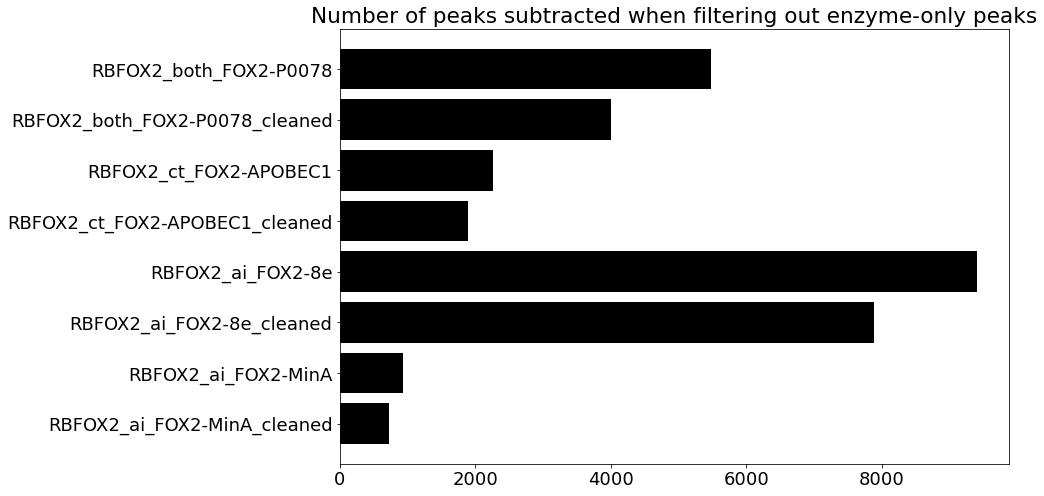

In [82]:
plt.figure(figsize=(12, 8))
plt.barh(labels, heights, color='k')
plt.title("Number of peaks subtracted when filtering out enzyme-only peaks")

# Venn diagrams of enzyme-only + fusion for each enzyme

In [132]:
fraction_subtracted_from_original_df = {}

for k,v in counts_dict.items():
    if 'RBFOX' in k:
        original = v.get('original')
        subtracted = v.get('subtracted')

        num_subtracted_from_original = len(original) - len(subtracted)
        print(num_subtracted_from_original)
        fraction = num_subtracted_from_original/len(original)
        fraction_subtracted_from_original_df[k] = fraction

360
1521
197
1473


In [115]:
fraction_subtracted_from_original_df

{'RBFOX2_ct_FOX2-APOBEC1': 0.1595037660611431,
 'RBFOX2_ai_FOX2-8e': 0.1617568861001808,
 'RBFOX2_ai_FOX2-MinA': 0.21114683815648447,
 'RBFOX2_both_FOX2-P0078': 0.2689919649379109}

(0.0, 0.3)

<Figure size 288x288 with 0 Axes>

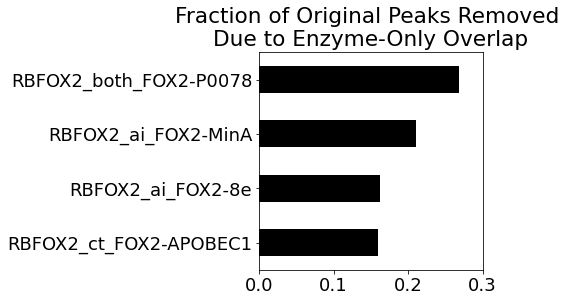

In [114]:
plt.figure(figsize=(4, 4))
pd.DataFrame(fraction_subtracted_from_original_df, index=['Fraction of Peaks Subtracted']).T.plot(kind='barh', 
                                                                                                  figsize=(4, 4),
                                                                                                  color='k',legend=False)
plt.title("Fraction of Original Peaks Removed \nDue to Enzyme-Only Overlap")
plt.xlim(0, .3)

In [133]:
for label in counts_dict.keys():
    if 'RBFOX2' in label:
        print(label)
        original = counts_dict.get(label).get('original')
        subtracted = counts_dict.get(label).get('subtracted')
        peaks_removed = original[original.label.isin(set(original.label).difference(set(subtracted.label)))].drop_duplicates()
        print('\t{} peaks removed'.format(len(peaks_removed)))
        
        peaks_removed.to_csv('6.1_peaks_removed/{}.tsv'.format(label), sep='\t')

RBFOX2_ct_FOX2-APOBEC1
	369 peaks removed
RBFOX2_ai_FOX2-8e
	1541 peaks removed
RBFOX2_ai_FOX2-MinA
	198 peaks removed
RBFOX2_both_FOX2-P0078
	1480 peaks removed


# Output enzyme-only peaks

In [134]:
enzyme_only_keys

['RBFOX2_ct_8e_alone',
 'RBFOX2_ct_APOBEC1_alone',
 'RBFOX2_ct_MinA_alone',
 'RBFOX2_ct_P0078_alone',
 'SLBP_ct_8e_Only',
 'SLBP_ct_APOBEC1_Only',
 'SLBP_ct_MinA_Only',
 'SLBP_ct_P0078_Only',
 'RBFOX2_ai_8e_alone',
 'RBFOX2_ai_APOBEC1_alone',
 'RBFOX2_ai_MinA_alone',
 'RBFOX2_ai_P0078_alone',
 'SLBP_ai_8e_Only',
 'SLBP_ai_APOBEC1_Only',
 'SLBP_ai_MinA_Only',
 'SLBP_ai_P0078_Only',
 'SLBP_both_P0078_Only',
 'RBFOX2_both_P0078_alone']

# Number of genes

In [8]:
import pandas as pd
from glob import glob

In [18]:
for f in glob('6.2_peaks_with_sequences/*'):
    print(f)
    df = pd.read_csv(f, sep='\t', index_col=0) 
    gene_set = set([l.split('|')[-1].split(':')[0] for l in df.index])
    gene_sets[f] = gene_set
    

6.2_peaks_with_sequences/RBFOX2_ai_FOX2-8e_cleaned.tsv
6.2_peaks_with_sequences/RBFOX2_both_FOX2-P0078.tsv
6.2_peaks_with_sequences/RBFOX2_ai_FOX2-MinA.tsv
6.2_peaks_with_sequences/RBFOX2_ct_APOBEC1_alone.tsv
6.2_peaks_with_sequences/RBFOX2_ai_MinA_alone.tsv
6.2_peaks_with_sequences/RBFOX2_ct_FOX2-APOBEC1_cleaned.tsv
6.2_peaks_with_sequences/RBFOX2_both_P0078_alone.tsv
6.2_peaks_with_sequences/RBFOX2_both_FOX2-P0078_cleaned.tsv
6.2_peaks_with_sequences/RBFOX2_ai_FOX2-8e.tsv
6.2_peaks_with_sequences/RBFOX2_ai_FOX2-MinA_cleaned.tsv
6.2_peaks_with_sequences/RBFOX2_ct_FOX2-APOBEC1.tsv
6.2_peaks_with_sequences/RBFOX2_ai_8e_alone.tsv


In [22]:
for k,v in gene_sets.items():
    if 'cleaned' in k:
        print(k, len(v))

6.2_peaks_with_sequences/RBFOX2_ai_FOX2-8e_cleaned.tsv 4151
6.2_peaks_with_sequences/RBFOX2_ct_FOX2-APOBEC1_cleaned.tsv 1274
6.2_peaks_with_sequences/RBFOX2_both_FOX2-P0078_cleaned.tsv 2437
6.2_peaks_with_sequences/RBFOX2_ai_FOX2-MinA_cleaned.tsv 549


In [29]:
counts_df = pd.DataFrame({k:len(v) for k,v in gene_sets.items()}, index=['']).T

In [34]:
counts_df = counts_df.loc[[i for i in counts_df.index if 'cleaned' in i]]

In [36]:
counts_df.index = [i.split('/')[-1].split('_cleaned')[0] for i in counts_df.index]

In [44]:
counts_df.columns = ['count']

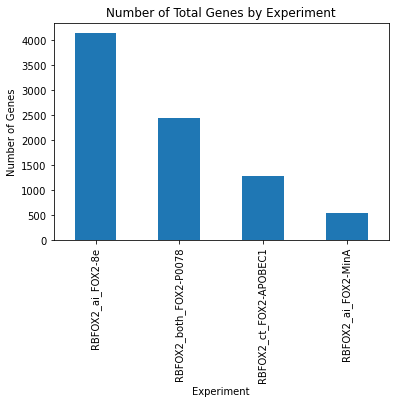

In [55]:
from matplotlib import pyplot as plt

counts_df.sort_values('count', ascending=False).plot(kind='bar', legend=False)
plt.ylabel('Number of Genes')
plt.xlabel("Experiment")
plt.title("Number of Total Genes by Experiment")
plt.savefig('images/svgs/gene_level/num_total_genes_by_experiment.svg', bbox_inches='tight')